# Aufgabenstellung

Kategorien der Verbrechen in San Francisco sollen vorhergesagt werden.
Dabei werden die Kategorien *Larceny/Theft*, *Assault*, *Drug/Narcotic*, *Vehicle Theft* und *Burglary* betrachtet

Zur Vorhersage soll **eine** dieser Methoden verwendet werden: Regression, Klassifikation oder Clustering



# Import

In [1]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\sampleSubmission.csv
data\test.csv
data\train.csv


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train.head()


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


# Exploration

## Selektion

Die Daten werden so gefiltert, dass nur *Larceny/Theft*, *Assault*, *Drug/Narcotic*, *Vehicle Theft* und *Burglary* als Kategorien vertreten sind.

In [3]:
train["Category"].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [4]:
categories = [i.upper() for i in ["Larceny/Theft", "Assault", "Drug/Narcotic", "Vehicle Theft", "Burglary"]]

train = train.loc[train["Category"].isin(categories)]

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'LARCENY/THEFT'),
  Text(1, 0, 'VEHICLE THEFT'),
  Text(2, 0, 'ASSAULT'),
  Text(3, 0, 'BURGLARY'),
  Text(4, 0, 'DRUG/NARCOTIC'),
  Text(5, 0, 'NORTHERN'),
  Text(6, 0, 'PARK'),
  Text(7, 0, 'INGLESIDE'),
  Text(8, 0, 'BAYVIEW'),
  Text(9, 0, 'RICHMOND'),
  Text(10, 0, 'CENTRAL'),
  Text(11, 0, 'TARAVAL'),
  Text(12, 0, 'SOUTHERN'),
  Text(13, 0, 'TENDERLOIN'),
  Text(14, 0, 'MISSION'),
  Text(15, 0, 'NONE'),
  Text(16, 0, 'ARREST, BOOKED'),
  Text(17, 0, 'JUVENILE BOOKED'),
  Text(18, 0, 'UNFOUNDED'),
  Text(19, 0, 'ARREST, CITED'),
  Text(20, 0, 'EXCEPTIONAL CLEARANCE'),
  Text(21, 0, 'CLEARED-CONTACT JUVENILE FOR MORE INFO'),
  Text(22, 0, 'COMPLAINANT REFUSES TO PROSECUTE'),
  Text(23, 0, 'JUVENILE CITED'),
  Text(24, 0, 'NOT PROSECUTED'),
  Text(25, 0, 'LOCATED'),
  Text(26, 0, 'PSYCHOPA

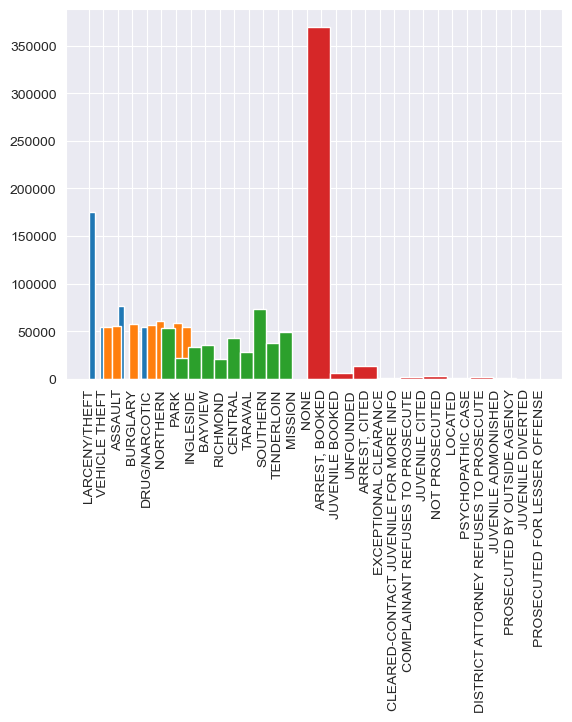

## Datentypen

In [5]:
train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

Hier kann man einige Datentypen konvertieren:

Dates -> DateTime
Category -> String
Descript -> String
DayOfWeek -> String
PdDistrict -> String
Resolution -> String

neue Spalte für CategoryID als Integer
neue Spalte für PdDisctrictID als Integer
neue Spalte für DayOfWeekID als Integer
neue Spalte für ResolutionID als Integer

In [110]:
def get_dow_id(day_of_week):
    day_of_week_dict = {"Monday" : 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7} 
    return day_of_week_dict[day_of_week]

train["Dates"] = pd.to_datetime(train["Dates"])
train["DayOfWeekId"] = train["DayOfWeek"].apply(get_dow_id)

In [108]:
pd.to_datetime(train["Dates"])

3        2015-05-13 23:30:00
4        2015-05-13 23:30:00
5        2015-05-13 23:30:00
6        2015-05-13 23:30:00
7        2015-05-13 23:30:00
                 ...        
878036   2003-01-06 00:55:00
878040   2003-01-06 00:33:00
878042   2003-01-06 00:20:00
878045   2003-01-06 00:01:00
878046   2003-01-06 00:01:00
Name: Dates, Length: 396283, dtype: datetime64[ns]

## Fehlende Werte

In [6]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

Wie oben zu sehen, gibt es keine fehlenden Werte in diesem Datensatz



In [7]:
train["Category"].unique()

array(['LARCENY/THEFT', 'VEHICLE THEFT', 'ASSAULT', 'BURGLARY',
       'DRUG/NARCOTIC'], dtype=object)

## Korrelation der Spalten



In [8]:
categories

import seaborn as sns
colors = sns.color_palette(None, 5)

In [20]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]

(array([3.96254e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.90000e+01]),
 array([37.70791996, 42.93712796, 48.16633597, 53.39554397, 58.62475197,
        63.85395998, 69.08316798, 74.31237599, 79.54158399, 84.770792  ,
        90.        ]),
 <BarContainer object of 10 artists>)

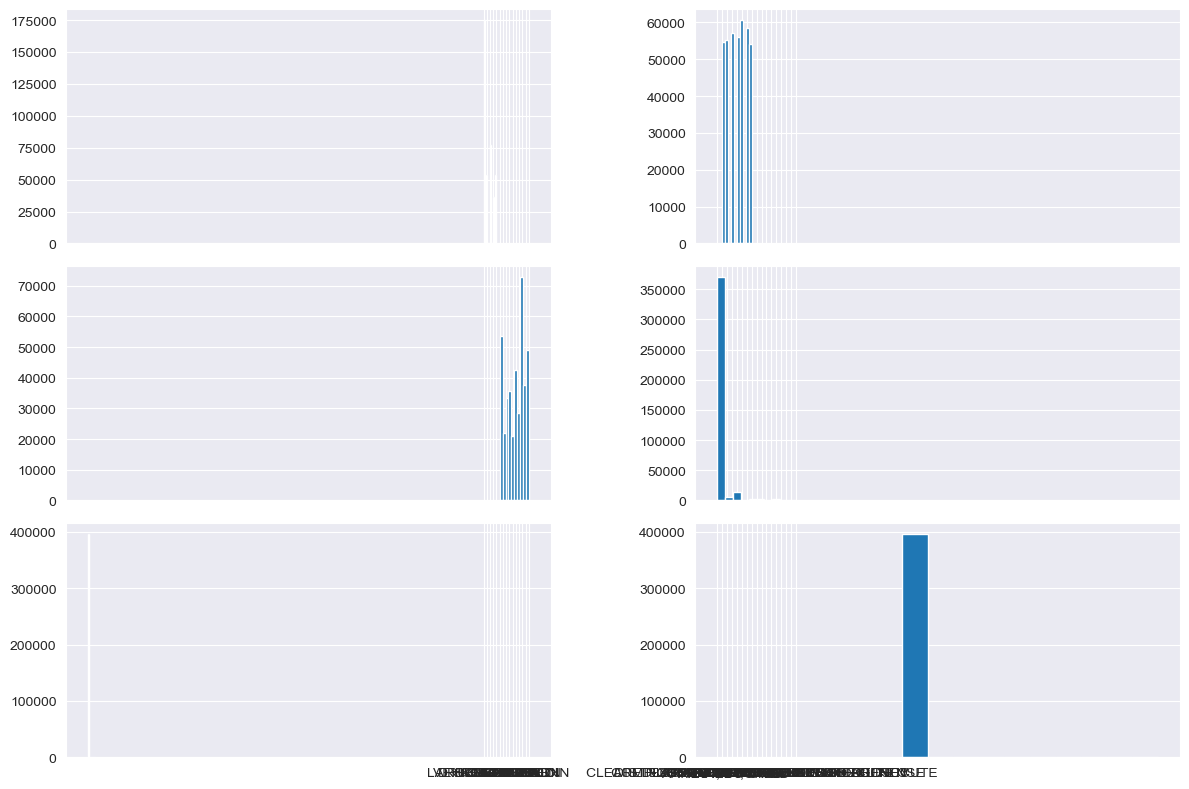

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette(None, 3)
columns = ["DayOfWeek", "PdDistrict", "Resolution"]


fig, axes = plt.subplots(3, 2, figsize = (12, 8), sharex="col", tight_layout=True)

axes[0,0].hist(train["Category"])
axes[0,1].hist(train["DayOfWeekId"])
axes[1,0].hist(train["PdDistrict"])
axes[1,1].hist(train["Resolution"])
axes[2,0].hist(train["X"])
axes[2,1].hist(train["Y"])

                

<Axes: xlabel='Y', ylabel='Count'>

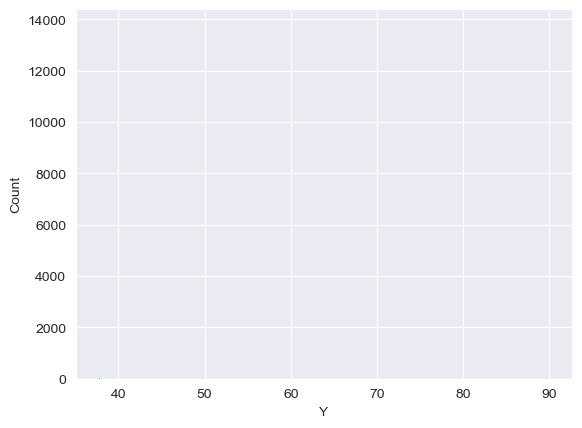

In [103]:
sns.histplot(train["Y"])

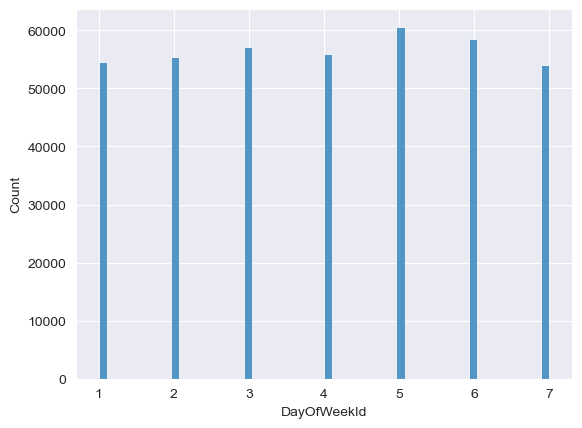

In [83]:
sns.histplot(train["DayOfWeekId"])
plt.show()

In [29]:
median_hour = np.median(hours)
bins = [10, 20, 30, 40, 50, 60]

fig, ax = plt.subplots(figsize = (6, 6))
ax.hist(hours, bins=bins, edgecolor="black", color="#69b3a2", alpha=0.3)

# axvline: axis vertical line
ax.axvline(median_hour, color="black", ls="--", label="Median hour")
ax.legend();

(array([57178., 55348.,     0., 54627.,     0., 54110., 58475.,     0.,
        60624., 55921.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

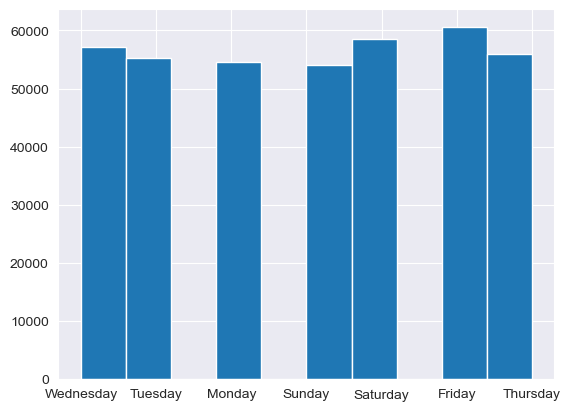

In [37]:
plt.hist(train["DayOfWeek"])

In [111]:
train.dtypes

Dates          datetime64[ns]
Category               object
Descript               object
DayOfWeek              object
PdDistrict             object
Resolution             object
Address                object
X                     float64
Y                     float64
DayOfWeekId             int64
dtype: object

In [156]:
train["YearMonth"] = train['Dates'].dt.strftime('%Y-%m')
train["Year"] = train['Dates'].dt.strftime('%Y')
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfWeekId,YearMonth,Year
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,3,2015-05,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,3,2015-05,2015
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,3,2015-05,2015
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,3,2015-05,2015
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,3,2015-05,2015


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015')])

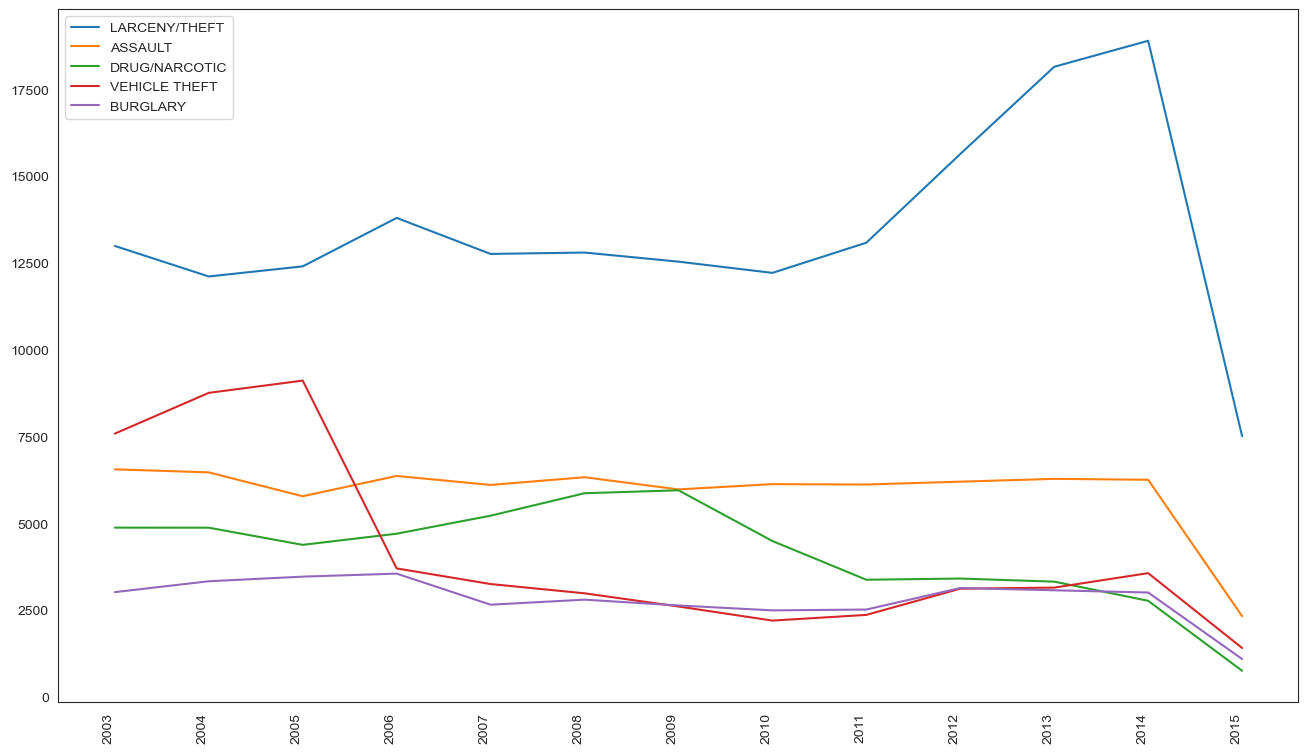

In [159]:
sns.set_style("white")

train_year_cat = train.groupby(by=["Year", "Category"], as_index=False).count()
data = train_year_cat.pivot_table(index="Year", columns="Category", values="Descript")

fig = plt.figure(figsize=(16,9))

for category in categories:
    plt.plot(data[category], label=category)

plt.legend()
plt.xticks(rotation=90, ha="right")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148],
 [Text(0, 0, '2003-01'),
  Text(1, 0, '2003-02'),
  Text(2, 0, '20

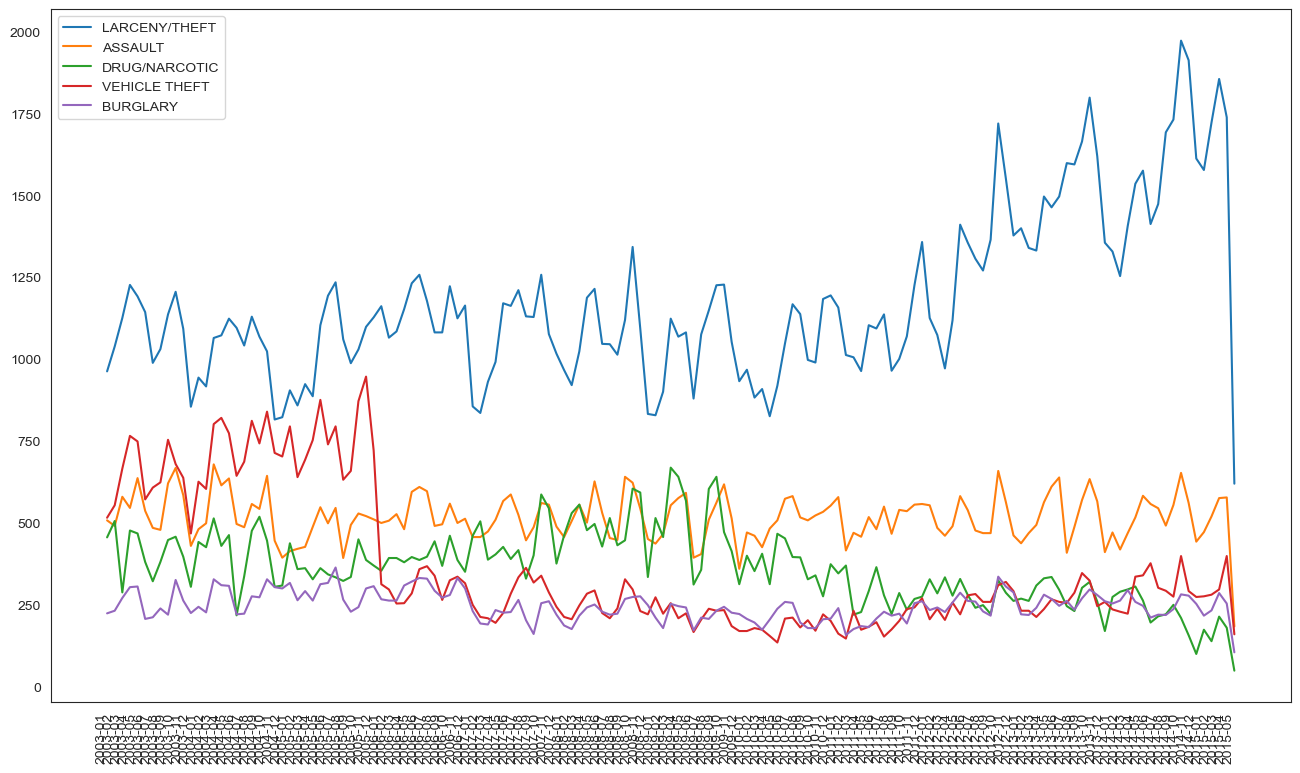

In [160]:
train_yearmonth_cat = train.groupby(by=["YearMonth", "Category"], as_index=False).count()
data = train_yearmonth_cat.pivot_table(index="YearMonth", columns="Category", values="Descript")

fig = plt.figure(figsize=(16,9))

for category in categories:
    plt.plot(data[category], label=category)

plt.legend()
plt.xticks(rotation=90, ha="right")

AttributeError: PathCollection.set() got an unexpected keyword argument 'figsize'

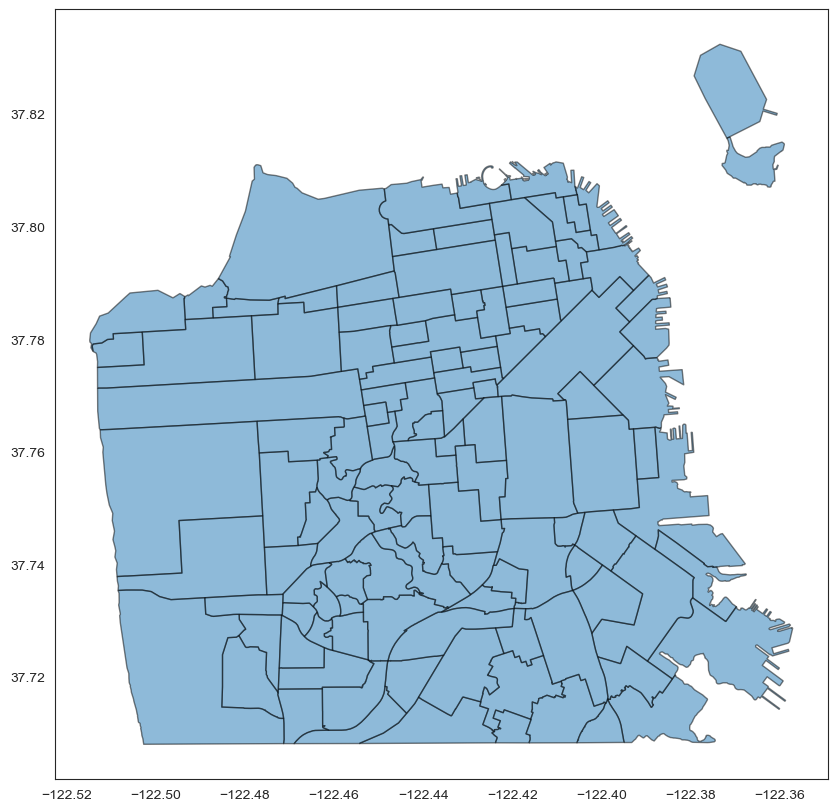

In [190]:
import geopandas
import geodatasets
import contextily as cx

df = geopandas.read_file("data/SF Find Neighborhoods.geojson")

ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
ax.scatter(x="X", y="Y", data=train)


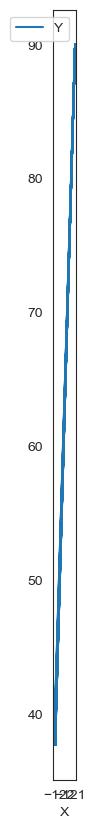

In [232]:
fig, ax = plt.subplots(figsize = (10, 10))

df.plot(alpha=0.5, edgecolor="k", zorder=1, ax=ax)
train[["X", "Y"]].plot(x="X", y="Y", ax=ax)


plt.show()


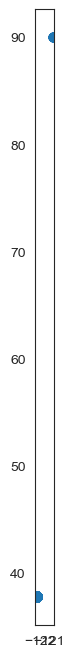

In [216]:
df = geopandas.read_file("data/SF Find Neighborhoods.geojson")
fig, ax = plt.subplots(figsize=[8,8])
df.plot(ax=ax, alpha=0.5, edgecolor='k')
# some data that can be plotted on centroid

sc = ax.scatter(data=train, x="X", y="Y")

#df["val"] = np.random.randint(1,100,len(df))

# use a discrete 
#cmap = plt.cm.get_cmap('jet', 5)
# scatter data based on co-ords of centroid


#sc = ax.scatter(x=df.centroid.x, y=df.centroid.y, s=50, c=df["val"], cmap=cmap)
#plt.colorbar(sc)


In [226]:
df.columns

Index(['link', 'name', 'geometry'], dtype='object')